# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [2]:
import numpy as np
from glob import glob
path = "C:/Users/gellesh/Desktop/CMP/Udacity Deep Learing NanoDegree/deep-learning-v2-pytorch-master/project-dog-classification"
# load filenames for human and dog images
human_files = np.array(glob(path +"/data/lfw/*/*"))
dog_files = np.array(glob(path + "/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


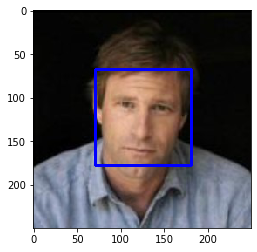

In [61]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [62]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

   __96%__ in human_files and __18%__ in dog_files it really depend on images as when I took next 100 images it yelds __98%__ in human_files and __6%__ in dog_files

In [63]:
from tqdm.notebook import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
acc_H = 0
acc_D = 0
for i in tqdm(range (100)):
    if (face_detector(human_files_short[i])):
        acc_H += 1
    if (face_detector(dog_files_short[i])):
        acc_D +=1

print(f'percentage of the first 100 images in human_files have a detected human face is {acc_H}%')
print(f'percentage of the first 100 images in dog_files have a detected human face is {acc_D}%')


percentage of the first 100 images in human_files have a detected human face is 96%
percentage of the first 100 images in dog_files have a detected human face is 18%


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [9]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [64]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [65]:
from PIL import Image
import torchvision.transforms as transforms
#Image.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## DONE: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    preprocess_transforms = transforms.Compose([transforms.CenterCrop(244),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    image = Image.open(img_path).convert('RGB')
     # discard the transparent, alpha channel (that's the :3)
    image = preprocess_transforms(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        image = image.cuda()
    
    VGG16.eval()
    score = VGG16(image)
    _ , max_index = torch.max(score,1)
                                 
    max_index = np.squeeze(max_index.numpy()) if not use_cuda else np.squeeze(max_index.cpu().numpy())
    return max_index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [66]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## Done: Complete the function.
    if VGG16_predict(img_path) in range(151,269):
        return True
    else:
        return False

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?   
- What percentage of the images in `dog_files_short` have a detected dog?   

__Answer:__ 
       __0%__ in human_files_short have detected dog face and __92%__ in dog_files_short have detected dog face.
        

In [67]:
### Done: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
acc_H = 0
acc_D = 0
for i in tqdm(range (100)):
    if (dog_detector(human_files_short[i])):
        acc_H += 1
    if (dog_detector(dog_files_short[i])):
        acc_D +=1

print(f'percentage of the first 100 images in human_files have a detected dog face is {acc_H}%')
print(f'percentage of the first 100 images in dog_files have a detected dog face is {acc_D}%')


percentage of the first 100 images in human_files have a detected dog face is 0%
percentage of the first 100 images in dog_files have a detected dog face is 92%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [68]:
### (Optional) 
### Done: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define ResNet-50 model
ResNet50 = models.resnet50(pretrained=True)
ResNet50.eval()

if use_cuda:
    ResNet50 = ResNet50.cuda() 
# define function to get predict
def ResNet50_predict(img_path):
    preprocess_transforms = transforms.Compose([transforms.CenterCrop(244),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    image = Image.open(img_path).convert('RGB')
     # discard the transparent, alpha channel (that's the :3)
    image = preprocess_transforms(image)[:3,:,:].unsqueeze(0)
    if use_cuda:
        image = image.cuda()
    score = ResNet50(image)
    _ , max_index = torch.max(score,1)
    max_index = np.squeeze(max_index.numpy()) if not use_cuda else np.squeeze(max_index.cpu().numpy())
    return max_index

def dog_detector2(img_path):
    if ResNet50_predict(img_path) in range(151,269):
        return True
    else:
        return False

## Report the performance of another pre-trained network Using ResNet-50 model.
__Answer:__ 
        __0%__ in human_files_short have detected dog face and __93%__ in dog_files_short have detected dog face.
        

In [69]:
acc_H = 0
acc_D = 0
for i in tqdm(range (100)):
    if (dog_detector2(human_files_short[i])):
        acc_H += 1
    if (dog_detector2(dog_files_short[i])):
        acc_D +=1

print(f'percentage of the first 100 images in human_files have a detected dog face is {acc_H}%')
print(f'percentage of the first 100 images in dog_files have a detected dog face is {acc_D}%')


percentage of the first 100 images in human_files have a detected dog face is 0%
percentage of the first 100 images in dog_files have a detected dog face is 93%


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [70]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from torchvision import datasets

### DONE: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

batch_size = 20
num_workers= 0

train_transforms = transforms.Compose([transforms.RandomRotation(10),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_transforms = transforms.Compose([transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_Data = datasets.ImageFolder(root=path +'/data/dog_images/train',transform = train_transforms)
valid_Data = datasets.ImageFolder(root=path +'/data/dog_images/valid',transform=test_transforms)
test_Data = datasets.ImageFolder(root=path + '/data/dog_images/test',transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_Data,batch_size=batch_size,shuffle=True,num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_Data,batch_size=batch_size,shuffle=True,num_workers=num_workers )
test_loader  = torch.utils.data.DataLoader(test_Data,batch_size=batch_size,shuffle=True,num_workers=num_workers)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:<br/> - My code resize using __Cropping__ , I pick 224 for input tensor as most pretrained models use this size as an input so I found that it is a good size to start with. <br/> - I simply augment my data using random rotation and random resized crop.

In [27]:
### TESTING CELL

import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

torch.Size([20, 3, 224, 224])


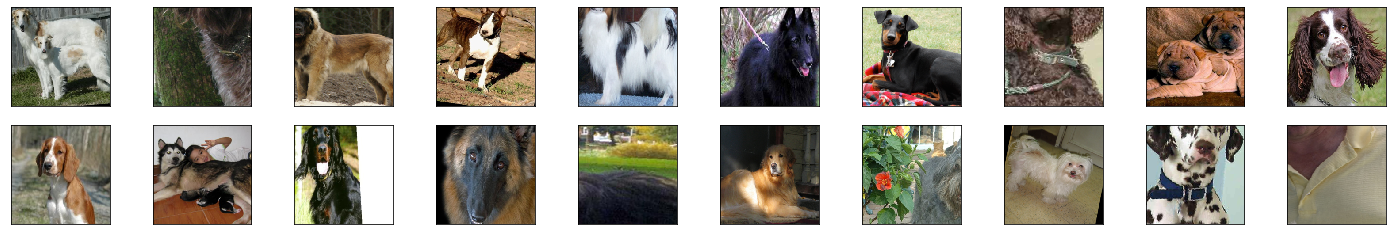

In [29]:
### TESTING CELL

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [73]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        # convolutional layer (sees 224x224x3 image tensor)
        self.conv1 = nn.Conv2d(3,16,3,padding =1)
        # convolutional layer (sees 56x56x16 image tensor)
        self.conv2 = nn.Conv2d(16,32,3,padding =1)
        # convolutional layer (sees 14x14x32 image tensor)
        self.conv3 = nn.Conv2d(32,64,3,padding =1)
        # max pooling layers 
        self.pool2 = nn.MaxPool2d(2,2)  # reduce spatial dim to half
        self.pool4 = nn.MaxPool2d(4,4)  # reduce spatial dim to quarter
        
        # Linear Layer (7 * 7 * 64 -> 3136)
        self.fc1 = nn.Linear(3136,1000)
        self.fc2 = nn.Linear(1000,500)
        self.fc3 = nn.Linear(500,133)
        
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.2)
    
    def forward(self, x):
        ## Define forward behavior
        # add sequence of convolutional with relu activation function and max pooling layers
        x = self.pool4(F.relu(self.conv1(x)))
        x = self.pool4(F.relu(self.conv2(x)))
        x = self.pool2(F.relu(self.conv3(x)))
        
        # flatten image input
        x = x.view(-1, 64 * 7 * 7)
       
        # add 1st Linear layer, with relu activation function and dropout for overfitting
        x = self.dropout(F.relu(self.fc1(x)))
        # add 2nd Linear layer, with relu activation function and dropout for overfitting
        x = self.dropout(F.relu(self.fc2(x)))
        # add final Linear layer with Log Soft_max activation function
        x = F.log_softmax(self.fc3(x),dim =1)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# move model to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__<br>  1 - first I considered to use 3 or more convolutional layers as the classification task is pretty challenging which will need more complex structure and I decide to use 3 conv layers. <br/> 2 - Then I decide to begin with fliter  size 16 then multpliy it by 2 and using max pooling layer of 2 stride and 2 kernal size . <br> 3- At last I founded my final output from 3 conv layers will be very big as an input to classifer so I add max pooling layer of 4 stride and 4 kernal size to reduce the spatial size by 4 instead of 2. <br> 4- I decide to have 2 hidden layers in my classifier as we used to do when we have a challenging problem in past exercises it takes an input of 3136 -> 1000 -> 500 -> 133 which gives us the number of our target. <br>5- I used dropout layer to avoid overfitting of data after each linear layer and I used log_softmax with final layer as it gives good result in classifcations problems. <br> 6- I used The negative log likelihood loss as It is useful to train a classification problem and good with log_softmax. <br> 7- I tried Adam and Adamax and SGD as optimizer and SGD Gives better result and I choose lr = 0.03 after I tried different values.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [74]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.NLLLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(),lr = 0.03)

loaders_scratch = {'train':train_loader , 'valid':valid_loader , 'test':test_loader}

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [36]:
from tqdm.notebook import tqdm
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in (range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate loss in batch 
            #('output shape {} / / target shape {}'.format(output.shape,target.shape))
            loss = criterion(output,target)
            # backward pass
            loss.backward()
            # perform parameter update
            optimizer.step()
            # update training loss
            #train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        print("out train mode")
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate loss in the batch
            loss = criterion(output, target)
            # update average validation loss 
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


# train the model
model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

out train mode
Epoch: 1 	Training Loss: 4.888331 	Validation Loss: 4.883971
Validation loss decreased (inf --> 4.883971).  Saving model ...
out train mode
Epoch: 2 	Training Loss: 4.880164 	Validation Loss: 4.872180
Validation loss decreased (4.883971 --> 4.872180).  Saving model ...
out train mode
Epoch: 3 	Training Loss: 4.871959 	Validation Loss: 4.866242
Validation loss decreased (4.872180 --> 4.866242).  Saving model ...
out train mode
Epoch: 4 	Training Loss: 4.868435 	Validation Loss: 4.862663
Validation loss decreased (4.866242 --> 4.862663).  Saving model ...
out train mode
Epoch: 5 	Training Loss: 4.862719 	Validation Loss: 4.855895
Validation loss decreased (4.862663 --> 4.855895).  Saving model ...
out train mode
Epoch: 6 	Training Loss: 4.851360 	Validation Loss: 4.825511
Validation loss decreased (4.855895 --> 4.825511).  Saving model ...
out train mode
Epoch: 7 	Training Loss: 4.805711 	Validation Loss: 4.745554
Validation loss decreased (4.825511 --> 4.745554).  Saving 

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [75]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.465662


Test Accuracy: 19% (165/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [76]:
## DONE: Specify data loaders
# I changed only Normalize values to match pretrained model and input size tensor to 299 to match inception v3 .
import torch
import torchvision.models as models
from PIL import Image
import torchvision.transforms as transforms
Image.LOAD_TRUNCATED_IMAGES = True
from torchvision import datasets

batch_size = 20
num_workers= 0

train_transforms = transforms.Compose([transforms.RandomRotation(10),
                                       transforms.RandomResizedCrop(299),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.CenterCrop(299),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])

train_Data = datasets.ImageFolder(root=path +'/data/dog_images/train',transform = train_transforms)
valid_Data = datasets.ImageFolder(root=path +'/data/dog_images/valid',transform=test_transforms)
test_Data = datasets.ImageFolder(root=path + '/data/dog_images/test',transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_Data,batch_size=batch_size,shuffle=True,num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_Data,batch_size=batch_size,shuffle=True,num_workers=num_workers )
test_loader  = torch.utils.data.DataLoader(test_Data,batch_size=batch_size,shuffle=True,num_workers=num_workers)


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [6]:
import torchvision.models as models
import torch.nn as nn
from collections import OrderedDict

## DONE: Specify model architecture

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# Load the pretrained model from pytorch
inception_v3 = models.inception_v3(pretrained=True,aux_logits=False)

# Freeze training for all "parameters" layers
for param in inception_v3.parameters():
    param.requires_grad = False
    
# change Last layer with classifer
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(2048, 1024)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(1024, 133)),
                          ('output', nn.LogSoftmax(dim=1))
                          ]))

inception_v3.fc = classifier

# set new model 
model_transfer = inception_v3

print(model_transfer.fc)
if use_cuda:
    model_transfer.cuda()
    


Sequential(
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
  (output): LogSoftmax()
)


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
### I took the approach of replacing the last layer only rather than fine tuning as the features provided throw these models is very useful and very similar to our dataset.
<br> 1- At First I began using vgg16 model and replaced the final layer with linear layer with 133 output size and used adam optimizer and cross entropy as loss function but it didnot give me good result after that I used SGD rather than adam and obtained 3.567 train loss and 3.743 validation loss and total accuracy __67 %__ after many approaches by changing Learn rate and optimzer and loss function my model wasnot learn too much and the accuracy didnot change. <br> 2 - Then I decided to try another model which is Inception v3 after I searched for similar task and I changed the last layer using classifer with one hidden layer and relu activation function and log_soft_max for the output and used SGD as an optimizer and NNloss as loss function and it performed very well after 15 epochs giving accuracy with __79%__ and after another 15 epochs giving accuracy with __82%__ .<br><br>  I took the approach of trial and error and after comparing between the two models I found inception v3 performed very well , the first model is saved under name model_transfer_usingVGG.pt .


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [7]:
import torch.optim as optim
criterion_transfer = nn.NLLLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr = 0.03)

loaders_transfer = {'train':train_loader , 'valid':valid_loader , 'test':test_loader}

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [8]:
from tqdm.notebook import tqdm
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in (range(1, n_epochs+1)):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate loss in batch 
            #('output shape {} / / target shape {}'.format(output.shape,target.shape))
            loss = criterion(output,target)
            # backward pass
            loss.backward()
            # perform parameter update
            optimizer.step()
            # update training loss
            #train_loss += loss.item()*data.size(0)
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        print("out train mode")
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate loss in the batch
            loss = criterion(output, target)
            # update average validation loss 
            #valid_loss += loss.item()*data.size(0)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
            valid_loss_min,
            valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
            
    # return trained model
    return model


In [52]:
# First 15 Epoch of Training

# train the model
model_transfer = train(15, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

out train mode
Epoch: 1 	Training Loss: 4.569804 	Validation Loss: 3.784474
Validation loss decreased (inf --> 3.784474).  Saving model ...
out train mode
Epoch: 2 	Training Loss: 3.174662 	Validation Loss: 1.982804
Validation loss decreased (3.784474 --> 1.982804).  Saving model ...
out train mode
Epoch: 3 	Training Loss: 2.018926 	Validation Loss: 1.235566
Validation loss decreased (1.982804 --> 1.235566).  Saving model ...
out train mode
Epoch: 4 	Training Loss: 1.626637 	Validation Loss: 0.982972
Validation loss decreased (1.235566 --> 0.982972).  Saving model ...
out train mode
Epoch: 5 	Training Loss: 1.421512 	Validation Loss: 0.864498
Validation loss decreased (0.982972 --> 0.864498).  Saving model ...
out train mode
Epoch: 6 	Training Loss: 1.335658 	Validation Loss: 0.784086
Validation loss decreased (0.864498 --> 0.784086).  Saving model ...
out train mode
Epoch: 7 	Training Loss: 1.264746 	Validation Loss: 0.758157
Validation loss decreased (0.784086 --> 0.758157).  Saving 

<All keys matched successfully>

In [54]:
# Second 15 epoch of training

# train the model
model_transfer = train(15, loaders_transfer, model_transfer, optimizer_transfer,
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

out train mode
Epoch: 1 	Training Loss: 1.087446 	Validation Loss: 0.624695
Validation loss decreased (inf --> 0.624695).  Saving model ...
out train mode
Epoch: 2 	Training Loss: 1.071530 	Validation Loss: 0.638511
out train mode
Epoch: 3 	Training Loss: 1.045091 	Validation Loss: 0.618662
Validation loss decreased (0.624695 --> 0.618662).  Saving model ...
out train mode
Epoch: 4 	Training Loss: 1.039865 	Validation Loss: 0.622171
out train mode
Epoch: 5 	Training Loss: 1.047850 	Validation Loss: 0.606605
Validation loss decreased (0.618662 --> 0.606605).  Saving model ...
out train mode
Epoch: 6 	Training Loss: 0.998782 	Validation Loss: 0.601971
Validation loss decreased (0.606605 --> 0.601971).  Saving model ...
out train mode
Epoch: 7 	Training Loss: 1.012411 	Validation Loss: 0.588329
Validation loss decreased (0.601971 --> 0.588329).  Saving model ...
out train mode
Epoch: 8 	Training Loss: 1.002019 	Validation Loss: 0.639382
out train mode
Epoch: 9 	Training Loss: 1.006091 	Va

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [77]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.595193


Test Accuracy: 82% (689/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [78]:
### Done: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_Data.classes]
def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    preprocess_transforms = transforms.Compose([transforms.CenterCrop(244),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
    image = Image.open(img_path).convert('RGB')
     # discard the transparent, alpha channel (that's the :3)
    image = preprocess_transforms(image)[:3,:,:].unsqueeze(0)
    if use_cuda:
        image = image.cuda()
    score = model_transfer(image)
    _ , max_index = torch.max(score,1)
    max_index = np.squeeze(max_index.numpy()) if not use_cuda else np.squeeze(max_index.cpu().numpy())
    return class_names[max_index]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [113]:
### Done: Write your algorithm.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img 
  
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    dog_breed = ""
    title= ""
    # check if dog is detected 
    if dog_detector2(img_path):
        dog_breed = predict_breed_transfer(img_path)
        title = "Hello dog ..."
    elif face_detector(img_path):
        dog_breed = predict_breed_transfer(img_path)
        title = "Hello Human ..."
    else:
        title = "Error try another image ..."
    
    # Show image and breed  
    im = img.imread(img_path) 
  
    # show image
    fig = plt.figure()
    plt.title(title,fontsize=15)
    plt.imshow(im) 
    fig.text(.5, .01, 'You look like a ..... '+dog_breed, ha='center',fontsize=15,color='green')
    
        
    

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output is quite Good :)  and for 3 points of improvement for my algorithm.<br> 1- If I have more images in my data set I think it will help me in training process as we have 133 different breed and have only 8351 images. <br>2- I think if I run for further epoches I can get better accuracy and I will need better Gpu for further training <br> 3- I think if we can try different models and take average can gives us better accuracy

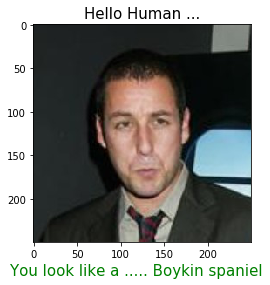

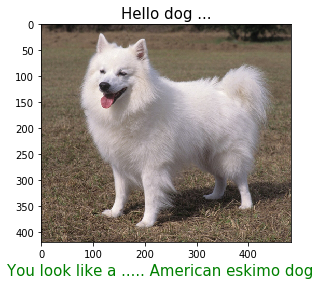

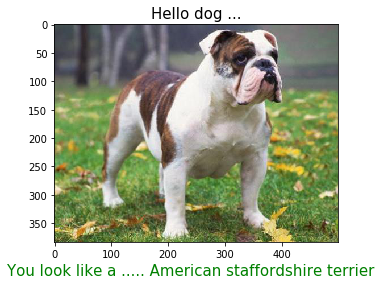

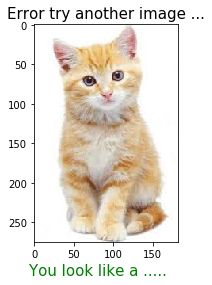

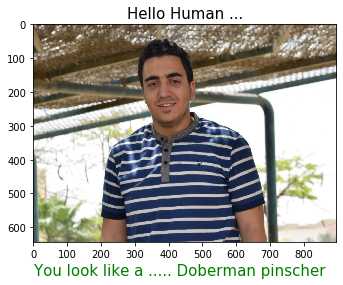

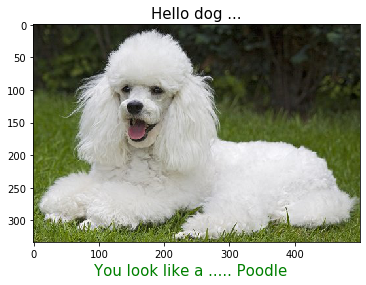

In [117]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
#for file in np.hstack((human_files[:3], dog_files[:3])):
    #run_app(file)
    
img_files = np.array(glob(path +"/Imgs/*"))
for file in img_files:
    run_app(file)